In [1]:
!pip install yfinance
!pip install yahoofinancials
import pandas as pd 
import yfinance as yf
from yahoofinancials import YahooFinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 11.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [29]:
df = yf.download('SOL-USD', start='2015-01-01', end='2022-12-31', progress=False)
df = df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-10,0.832005,1.313487,0.694187,0.951054,0.951054,87364276
1,2020-04-11,0.951054,1.049073,0.765020,0.776819,0.776819,43862444
2,2020-04-12,0.785448,0.956670,0.762426,0.882507,0.882507,38736897
3,2020-04-13,0.890760,0.891603,0.773976,0.777832,0.777832,18211285
4,2020-04-14,0.777832,0.796472,0.628169,0.661925,0.661925,16747614
...,...,...,...,...,...,...,...
990,2022-12-26,11.387690,11.453410,11.138464,11.306611,11.306611,132410401
991,2022-12-27,11.309179,11.390708,10.766210,11.085430,11.085430,223332961
992,2022-12-28,11.084863,11.098109,9.522949,9.755906,9.755906,468728777
993,2022-12-29,9.755775,9.827129,8.141268,9.651783,9.651783,772500177


In [30]:
df = df[['Date','Close']]
df = df.rename(columns={'Date':'ds','Close':'y'})
df.tail(10)

,ds,y
985,2022-12-21,12.128985
986,2022-12-22,11.794829
987,2022-12-23,11.786166
988,2022-12-24,11.444276
989,2022-12-25,11.387903
990,2022-12-26,11.306611
991,2022-12-27,11.085430
992,2022-12-28,9.755906
993,2022-12-29,9.651783
994,2022-12-30,9.880177


In [31]:
df = df[:-1]
df

,ds,y
0,2020-04-10,0.951054
1,2020-04-11,0.776819
2,2020-04-12,0.882507
3,2020-04-13,0.777832
4,2020-04-14,0.661925
...,...,...
989,2022-12-25,11.387903
990,2022-12-26,11.306611
991,2022-12-27,11.085430
992,2022-12-28,9.755906


In [32]:
!pip install NeuralProphet
from neuralprophet import NeuralProphet
from matplotlib import pyplot as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
m = NeuralProphet()
m.fit(df, freq='D', epochs=100)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.899% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.899% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO:NP.config:Auto-set batch_size to 16
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: 

Finding best initial lr:   0%|          | 0/225 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,385.097351,473.544159,1.251802,0.0,0
1,362.642853,448.524567,1.162185,0.0,1
2,324.246826,408.737457,1.005751,0.0,2
3,264.037048,339.781738,0.771616,0.0,3
4,187.019928,245.989716,0.480449,0.0,4
...,...,...,...,...,...
95,9.221324,11.781477,0.001629,0.0,95
96,8.974856,11.503866,0.001547,0.0,96
97,8.947476,11.465243,0.001535,0.0,97
98,8.872659,11.450400,0.001524,0.0,98


In [34]:
future = m.make_future_dataframe(df, periods=120)
forecast = m.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.899% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.899% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.167% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.167% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 63it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2022-12-30,None,-5.907656,-23.714952,18.249079,-0.441783
1,2022-12-31,None,-5.628648,-24.172958,17.682058,0.862250
2,2023-01-01,None,-7.464590,-24.631010,17.079531,0.086888
3,2023-01-02,None,-9.068886,-25.089106,16.440842,-0.420623
4,2023-01-03,None,-10.378669,-25.547157,15.765630,-0.597143


In [35]:
future.tail()

,ds,y
115,2023-04-24,None
116,2023-04-25,None
117,2023-04-26,None
118,2023-04-27,None
119,2023-04-28,None


WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


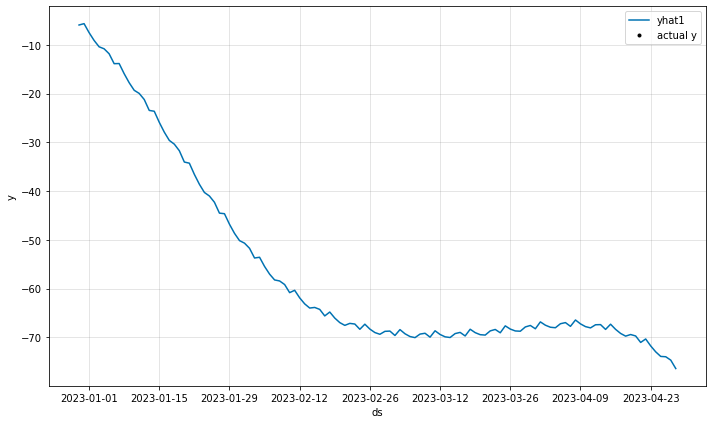

In [36]:
plot1 = m.plot(forecast)

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


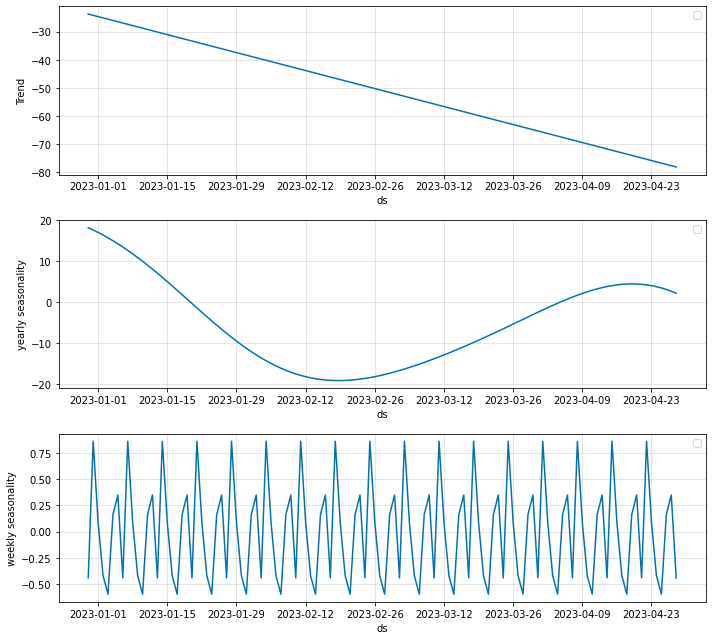

In [37]:
plot2 = m.plot_components(forecast)